### Задание 1.1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
data = boston["data"]
target = boston["target"]
feature_names = boston["feature_names"]

Создадим два датафрейма X - признаки недвижимости, y - цена на недвижимость

In [6]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y = pd.DataFrame(target, columns = ['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбиение выборки на тренировочную и тестовую

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
print(f'X_train.shape = {X_train.shape}\ny_train.shape = {y_train.shape}\nX_test.shape = {X_test.shape}\ny_test.shape = {y_test.shape}')

X_train.shape = (404, 13)
y_train.shape = (404, 1)
X_test.shape = (102, 13)
y_test.shape = (102, 1)


Масштабируем данные

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [12]:
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [13]:
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687


Построим модель TSNE

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f'до: {format(X_train_scaled.shape)}\nпосле: {format(X_train_tsne.shape)}')

до: (404, 13)
после: (404, 2)


Построим диаграмму рассеяния

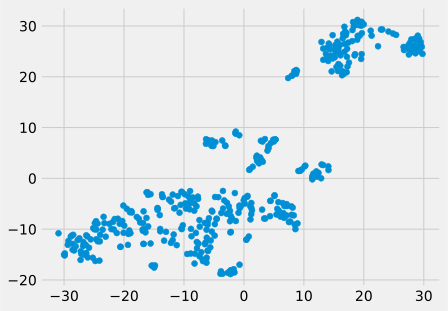

In [15]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

_____________________________________________________________________________________________________

### Задание 1.2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)

Построим диаграмму рассеяния

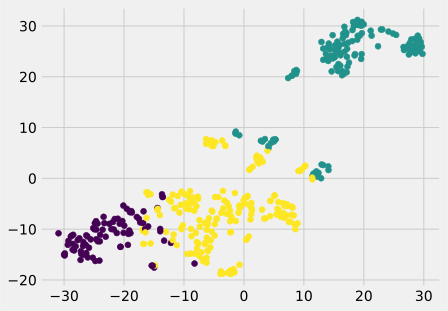

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.show()

In [18]:
print('Средние значения price:')
print(f'Кластер 0: {format(y_train[labels_train == 0].mean())}')
print(f'Кластер 1: {format(y_train[labels_train == 1].mean())}')
print(f'Кластер 2: {format(y_train[labels_train == 2].mean())}')
print('Средние значения CRIM:')
print(f'Кластер 0: {format(X_train.loc[labels_train == 0, "CRIM"].mean())}')
print(f'Кластер 1: {format(X_train.loc[labels_train == 1, "CRIM"].mean())}')
print(f'Кластер 2: {format(X_train.loc[labels_train == 2, "CRIM"].mean())}')

Средние значения price:
Кластер 0: price    27.788372
dtype: float64
Кластер 1: price    16.165354
dtype: float64
Кластер 2: price    24.958115
dtype: float64
Средние значения CRIM:
Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


_____________________________________________________________________________________________________

### Задание 1.3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [19]:
labels_test = kmeans.predict(X_test_scaled)

In [20]:
print('Средние значения price:')
print(f'Кластер 0: {format(y_test[labels_test == 0].mean())}')
print(f'Кластер 1: {format(y_test[labels_test == 1].mean())}')
print(f'Кластер 2: {format(y_test[labels_test == 2].mean())}')
print('Средние значения CRIM:')
print(f'Кластер 0: {format(X_test.loc[labels_test == 0, "CRIM"].mean())}')
print(f'Кластер 1: {format(X_test.loc[labels_test == 1, "CRIM"].mean())}')
print(f'Кластер 2: {format(X_test.loc[labels_test == 2, "CRIM"].mean())}')

Средние значения price:
Кластер 0: price    31.35
dtype: float64
Кластер 1: price    16.437143
dtype: float64
Кластер 2: price    21.860784
dtype: float64
Средние значения CRIM:
Кластер 0: 0.062060000000000004
Кластер 1: 10.165531142857143
Кластер 2: 0.26607882352941176


_____________________________________________________________________________________________________

### Задание 1.4

Обучите любую модель регрессии на этом же датасете. 

Добавьте новый признак - метка кластера, которую вы уже получили применив модель кластеризации к этим данным. 

Сравнить качество без метки кластера и с ней по отложенной выборке.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [22]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    R2 = round(r2(true_values, pred_values), 3)
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 60], [0, 60], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()
                  
    return R2

Построим модель градиентного бустинга

In [23]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=100)

gb_model.fit(X_train_scaled, y_train)


y_train_preds = gb_model.predict(X_train_scaled)
y_train_preds = np.clip(y_train_preds, a_min=0, a_max=5000)

Проверим модель на тренировочных данных

R2:	0.991
RMSE:	0.895
MSE:	0.801


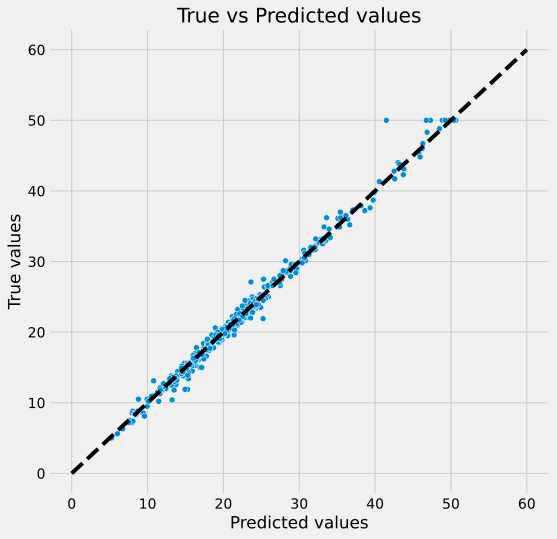

In [24]:
a = y_train.iloc[:,0]
b = y_train_preds
r2_train1 = evaluate_preds(a, b)

Проверим модель на тестовых данных

R2:	0.882
RMSE:	2.943
MSE:	8.662


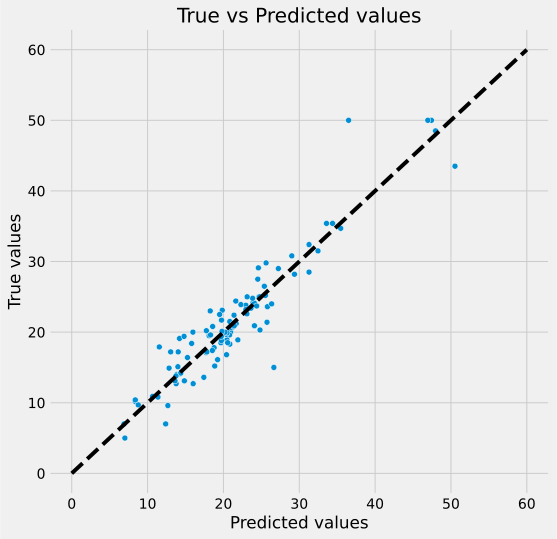

In [25]:
y_test_preds = gb_model.predict(X_test_scaled)

a = y_test.iloc[:,0]
b = y_test_preds

r2_test1 = evaluate_preds(a, b)

Добавим в обучающую выборку дамми-переменные категориальных признаков

In [26]:
X_train_scaled2 = X_train_scaled.copy()
X_train_scaled2['Claster'] = labels_train

X_train_scaled2["Claster"] = X_train_scaled2["Claster"].astype("category")
X_train_scaled2 = pd.get_dummies(X_train_scaled2)

X_train_scaled2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Claster_0,Claster_1,Claster_2
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505,0,1,0
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474,0,0,1
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595,1,0,0
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387,0,1,0
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787,0,0,1


Построим модель градиентного бустинга

In [27]:
gb_model2 = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=100)

gb_model2.fit(X_train_scaled2, y_train)


y_train_preds2 = gb_model2.predict(X_train_scaled2)
y_train_preds2 = np.clip(y_train_preds2, a_min=0, a_max=5000)

Проверим модель на обучающей выборке

R2:	0.991
RMSE:	0.897
MSE:	0.804


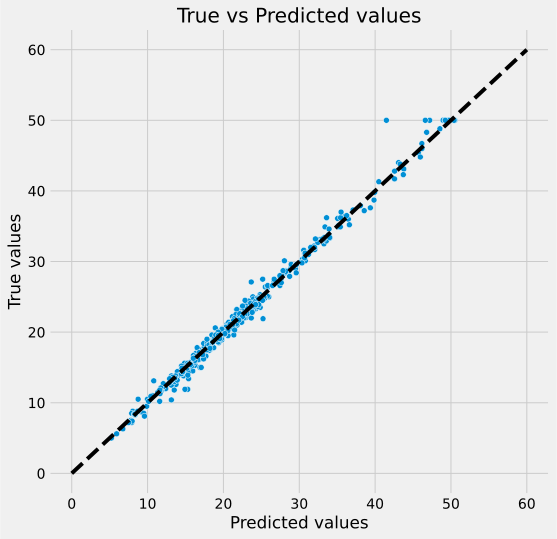

In [28]:
a = y_train.iloc[:,0]
b = y_train_preds2
r2_train2 = evaluate_preds(a, b)

Добавим в тестовую выборку дамми-переменные категориальных признаков

In [29]:
X_test_scaled2 = X_test_scaled.copy()
X_test_scaled2['Claster'] = labels_test

X_test_scaled2["Claster"] = X_test_scaled2["Claster"].astype("category")
X_test_scaled2 = pd.get_dummies(X_test_scaled2)

X_test_scaled2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Claster_0,Claster_1,Claster_2
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210,0,0,1
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094,1,0,0
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338,0,1,0
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875,0,0,1
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687,0,1,0


Проверим модель на тестовой выборке

R2:	0.881
RMSE:	2.951
MSE:	8.709


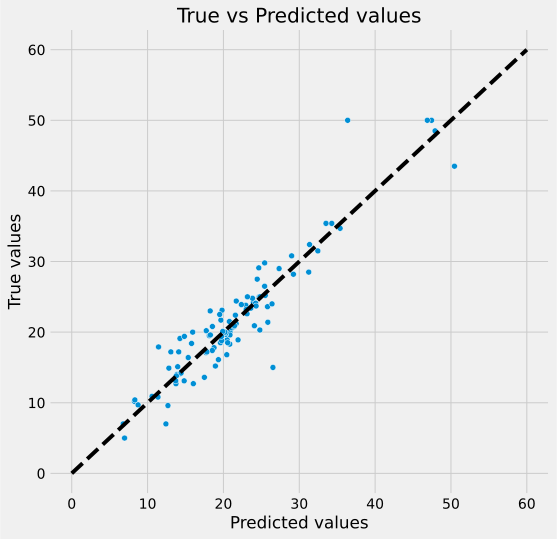

In [30]:
y_test_preds2 = gb_model2.predict(X_test_scaled2)
X_test_scaled

X_test_scaled2 = X_test_scaled.copy()
X_test_scaled2['Claster'] = labels_test
X_test_scaled2
a = y_test.iloc[:,0]
b = y_test_preds2

r2_test2 = evaluate_preds(a, b)

Добавление категориальных признаков в обучающую выборку не повысило метрики

In [31]:
print(f'R2 на тренировочных данных: {r2_train1}')
print(f'R2 на тестовых данных: {r2_test1}')
print(f'R2 на тренировочных данных с добавлением категориальных признаков: {r2_train2}')
print(f'R2 на тестовых данных с добавлением категориальных признаков: {r2_test2}')

R2 на тренировочных данных: 0.991
R2 на тестовых данных: 0.882
R2 на тренировочных данных с добавлением категориальных признаков: 0.991
R2 на тестовых данных с добавлением категориальных признаков: 0.881
